In [1]:
import sqlite3

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.colors as pc


import warnings
warnings.filterwarnings("ignore")


In [2]:

conn = sqlite3.connect("chinook.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in DB:", tables)


Tables in DB: []


In [3]:
conn = sqlite3.connect("/kaggle/input/chinook-music-store-data/chinook.db")
cursor = conn.cursor()


In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in DB:", tables)


Tables in DB: [('album',), ('artist',), ('customer',), ('employee',), ('genre',), ('invoice',), ('invoice_line',), ('media_type',), ('playlist',), ('playlist_track',), ('track',)]


In [5]:
query = "SELECT * FROM Album LIMIT 5;"  # غيّر Album بالاسم اللي يطلع معاك
df = pd.read_sql(query, conn)
print(df)


   album_id                                  title  artist_id
0         1  For Those About To Rock We Salute You          1
1         2                      Balls to the Wall          2
2         3                      Restless and Wild          2
3         4                      Let There Be Rock          1
4         5                               Big Ones          3


In [6]:
pd.read_sql_query("PRAGMA table_info(album);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,album_id,INTEGER,1,None,1
1,1,title,NVARCHAR(160),1,None,0
2,2,artist_id,INTEGER,1,None,0


In [7]:
db_path = "/kaggle/input/chinook-music-store-data/chinook.db"
conn = sqlite3.connect(db_path)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,album
1,artist
2,customer
3,employee
4,genre
5,invoice
6,invoice_line
7,media_type
8,playlist
9,playlist_track


In [8]:
for table_name in tables['name']:
    cols = pd.read_sql_query(f"PRAGMA table_info({table_name});", conn)
    df = cols[['name', 'type']]
    print(f"TABLE: {table_name}")
    display(df)

TABLE: album


,name,type
0,album_id,INTEGER
1,title,NVARCHAR(160)
2,artist_id,INTEGER


TABLE: artist


,name,type
0,artist_id,INTEGER
1,name,NVARCHAR(120)


TABLE: customer


,name,type
0,customer_id,INTEGER
1,first_name,NVARCHAR(40)
2,last_name,NVARCHAR(20)
3,company,NVARCHAR(80)
4,address,NVARCHAR(70)
5,city,NVARCHAR(40)
6,state,NVARCHAR(40)
7,country,NVARCHAR(40)
8,postal_code,NVARCHAR(10)
9,phone,NVARCHAR(24)


TABLE: employee


,name,type
0,employee_id,INTEGER
1,last_name,NVARCHAR(20)
2,first_name,NVARCHAR(20)
3,title,NVARCHAR(30)
4,reports_to,INTEGER
5,birthdate,DATETIME
6,hire_date,DATETIME
7,address,NVARCHAR(70)
8,city,NVARCHAR(40)
9,state,NVARCHAR(40)


TABLE: genre


,name,type
0,genre_id,INTEGER
1,name,NVARCHAR(120)


TABLE: invoice


,name,type
0,invoice_id,INTEGER
1,customer_id,INTEGER
2,invoice_date,DATETIME
3,billing_address,NVARCHAR(70)
4,billing_city,NVARCHAR(40)
5,billing_state,NVARCHAR(40)
6,billing_country,NVARCHAR(40)
7,billing_postal_code,NVARCHAR(10)
8,total,"NUMERIC(10,2)"


TABLE: invoice_line


,name,type
0,invoice_line_id,INTEGER
1,invoice_id,INTEGER
2,track_id,INTEGER
3,unit_price,"NUMERIC(10,2)"
4,quantity,INTEGER


TABLE: media_type


,name,type
0,media_type_id,INTEGER
1,name,NVARCHAR(120)


TABLE: playlist


,name,type
0,playlist_id,INTEGER
1,name,NVARCHAR(120)


TABLE: playlist_track


,name,type
0,playlist_id,INTEGER
1,track_id,INTEGER


TABLE: track


,name,type
0,track_id,INTEGER
1,name,NVARCHAR(200)
2,album_id,INTEGER
3,media_type_id,INTEGER
4,genre_id,INTEGER
5,composer,NVARCHAR(220)
6,milliseconds,INTEGER
7,bytes,INTEGER
8,unit_price,"NUMERIC(10,2)"


In [9]:
for table_name in tables['name']:
    print(f"\n📌 Table: {table_name}")
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
    display(df)



📌 Table: album


,album_id,title,artist_id
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3



📌 Table: artist


,artist_id,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains



📌 Table: customer


,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4



📌 Table: employee


,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com



📌 Table: genre


,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll



📌 Table: invoice


,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83



📌 Table: invoice_line


,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1



📌 Table: media_type


,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file



📌 Table: playlist


,playlist_id,name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music



📌 Table: playlist_track


,playlist_id,track_id
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392



📌 Table: track


,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [10]:
for table_name in tables['name']:
    # هات الأعمدة كلها
    cols = pd.read_sql_query(f"PRAGMA table_info({table_name});", conn)
    num_cols = cols.shape[0]  # عدد الأعمدة

    # هات عدد الصفوف
    num_rows = pd.read_sql_query(f"SELECT COUNT(*) as cnt FROM {table_name};", conn)['cnt'][0]
    print(f"📌 Table: {table_name} → Shape: ({num_rows}, {num_cols})")

    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
    display(df)

📌 Table: album → Shape: (347, 3)


,album_id,title,artist_id
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


📌 Table: artist → Shape: (275, 2)


,artist_id,name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


📌 Table: customer → Shape: (59, 13)


,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


📌 Table: employee → Shape: (8, 15)


,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


📌 Table: genre → Shape: (25, 2)


,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


📌 Table: invoice → Shape: (614, 9)


,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


📌 Table: invoice_line → Shape: (4757, 5)


,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1


📌 Table: media_type → Shape: (5, 2)


,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


📌 Table: playlist → Shape: (18, 2)


,playlist_id,name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music


📌 Table: playlist_track → Shape: (8715, 2)


,playlist_id,track_id
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392


📌 Table: track → Shape: (3503, 9)


,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


for table_name in tables['name']:
    print(f"\n📊 Table: {table_name}")
    
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    
    print(f"Shape: {df.shape}")   
    print(df.describe(include="all"))


In [11]:

def table_summary(df):
    summary = pd.DataFrame({
        "dtype": df.dtypes,
        "non_null_count": df.notnull().sum(),
        "null_count": df.isnull().sum(),
        "unique_values": df.nunique(),
    })

    # إضافة أقل وأعلى قيمة للأعمدة الرقمية
    summary["min"] = df.min(numeric_only=True)
    summary["max"] = df.max(numeric_only=True)

    return summary

# الاستخدام مع كل جدول
for table_name in tables['name']:
    print(f"\n📊 Table: {table_name}")
    df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)
    display(table_summary(df))



📊 Table: album


,dtype,non_null_count,null_count,unique_values,min,max
album_id,int64,347,0,347,1.0,347.0
title,object,347,0,347,NaN,NaN
artist_id,int64,347,0,204,1.0,275.0



📊 Table: artist


,dtype,non_null_count,null_count,unique_values,min,max
artist_id,int64,275,0,275,1.0,275.0
name,object,275,0,275,NaN,NaN



📊 Table: customer


,dtype,non_null_count,null_count,unique_values,min,max
customer_id,int64,59,0,59,1.0,59.0
first_name,object,59,0,57,NaN,NaN
last_name,object,59,0,59,NaN,NaN
company,object,10,49,10,NaN,NaN
address,object,59,0,59,NaN,NaN
city,object,59,0,53,NaN,NaN
state,object,30,29,25,NaN,NaN
country,object,59,0,24,NaN,NaN
postal_code,object,55,4,55,NaN,NaN
phone,object,58,1,58,NaN,NaN



📊 Table: employee


,dtype,non_null_count,null_count,unique_values,min,max
employee_id,int64,8,0,8,1.0,8.0
last_name,object,8,0,8,NaN,NaN
first_name,object,8,0,8,NaN,NaN
title,object,8,0,5,NaN,NaN
reports_to,float64,7,1,3,1.0,6.0
birthdate,object,8,0,8,NaN,NaN
hire_date,object,8,0,8,NaN,NaN
address,object,8,0,8,NaN,NaN
city,object,8,0,3,NaN,NaN
state,object,8,0,1,NaN,NaN



📊 Table: genre


,dtype,non_null_count,null_count,unique_values,min,max
genre_id,int64,25,0,25,1.0,25.0
name,object,25,0,25,NaN,NaN



📊 Table: invoice


,dtype,non_null_count,null_count,unique_values,min,max
invoice_id,int64,614,0,614,1.00,614.00
customer_id,int64,614,0,59,1.00,59.00
invoice_date,object,614,0,503,NaN,NaN
billing_address,object,614,0,59,NaN,NaN
billing_city,object,614,0,53,NaN,NaN
billing_state,object,614,0,26,NaN,NaN
billing_country,object,614,0,24,NaN,NaN
billing_postal_code,object,614,0,56,NaN,NaN
total,float64,614,0,21,0.99,23.76



📊 Table: invoice_line


,dtype,non_null_count,null_count,unique_values,min,max
invoice_line_id,int64,4757,0,4757,1.00,4757.00
invoice_id,int64,4757,0,614,1.00,614.00
track_id,int64,4757,0,1806,1.00,3500.00
unit_price,float64,4757,0,1,0.99,0.99
quantity,int64,4757,0,1,1.00,1.00



📊 Table: media_type


,dtype,non_null_count,null_count,unique_values,min,max
media_type_id,int64,5,0,5,1.0,5.0
name,object,5,0,5,NaN,NaN



📊 Table: playlist


,dtype,non_null_count,null_count,unique_values,min,max
playlist_id,int64,18,0,18,1.0,18.0
name,object,18,0,14,NaN,NaN



📊 Table: playlist_track


,dtype,non_null_count,null_count,unique_values,min,max
playlist_id,int64,8715,0,14,1,18
track_id,int64,8715,0,3503,1,3503



📊 Table: track


,dtype,non_null_count,null_count,unique_values,min,max
track_id,int64,3503,0,3503,1.00,3.503000e+03
name,object,3503,0,3257,NaN,NaN
album_id,int64,3503,0,347,1.00,3.470000e+02
media_type_id,int64,3503,0,5,1.00,5.000000e+00
genre_id,int64,3503,0,25,1.00,2.500000e+01
composer,object,2525,978,852,NaN,NaN
milliseconds,int64,3503,0,3080,1071.00,5.286953e+06
bytes,int64,3503,0,3501,38747.00,1.059546e+09
unit_price,float64,3503,0,2,0.99,1.990000e+00


# TASKS
🟢 تحليلات العملاء (Customer Analysis):

Top Customers by Spending:
مين أكتر 10 عملاء صرفوا فلوس (بناءً على جدول invoice)؟
(Customer Name + Total Spending)

Customers by Country:
توزيع العملاء حسب الدولة + مين أكتر دولة فيها عملاء؟

Customer Lifetime Value:
كل عميل صرف قد إيه في كل الفواتير بتاعته (Customer Lifetime Spending).

🟡 تحليلات المبيعات (Sales Analysis):

Monthly Sales Trend:
إجمالي المبيعات لكل شهر (بناءً على invoice_date).
(نرسم Line Chart يوضح الاتجاه)

Top Genres by Revenue:
أي Genre جاب أكبر مبيعات (بدمج track, genre, invoice_line، invoice).

Top Tracks by Quantity Sold:
أكتر الأغاني اللي اتباعت بالعدد (quantity).

🔵 تحليلات الفنانين والألبومات (Artist & Album Analysis):

Top Artists by Number of Tracks:
مين الفنانين اللي عندهم أكبر عدد أغاني؟

Top Artists by Revenue:
نربط artist + album + track + invoice_line عشان نعرف مين الفنان اللي جاب أكبر فلوس.

Albums with Highest Revenue:
أكتر 10 ألبومات حققت دخل.

🟣 تحليل الموظفين (Employee / Support Analysis):

Sales by Support Rep:
في جدول employee فيه Support Rep لكل عميل. عايزين نشوف كل موظف عملاءه صرفوا قد إيه (تقييم الأداء).

## 1. Top Customers by Spending
هنجمع كل الفواتير لكل عميل (SUM(total))، ونرتبهم تنازلي عشان نجيب أكتر 10 عملاء صرفوا.

In [12]:
# select data 
query_cutomer_df  = """
Select 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    c.country,
    ROUND(SUM(i.total) , 1) AS total_spent

FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.customer_id , customer_name, c.country
""" 

cutomer_df =pd.read_sql_query(query_cutomer_df, conn)
top_customers = cutomer_df.sort_values(ascending = False , by = "total_spent" ).head()
top_customers

,customer_id,customer_name,country,total_spent
4,5,František Wichterlová,Czech Republic,144.5
5,6,Helena Holý,Czech Republic,128.7
45,46,Hugh O'Reilly,Ireland,114.8
57,58,Manoj Pareek,India,111.9
0,1,Luís Gonçalves,Brazil,108.9


group by
➡️ "هات كل عميل (باسمه وبلده)، واجمع كل الفواتير بتاعته في صف واحد".

In [13]:
# 1. Top Customers by Spending
query_cutomer_df  = """
Select 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    c.country,
    ROUND(SUM(i.total) , 1) AS total_spent

FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY c.customer_id , customer_name, c.country

ORDER BY total_spent DESC
LIMIT 5;

""" 
# DESC = descinding
top_customers = pd.read_sql_query(query_cutomer_df, conn)
display(top_customers)


,customer_id,customer_name,country,total_spent
0,5,František Wichterlová,Czech Republic,144.5
1,6,Helena Holý,Czech Republic,128.7
2,46,Hugh O'Reilly,Ireland,114.8
3,58,Manoj Pareek,India,111.9
4,1,Luís Gonçalves,Brazil,108.9


## 2. Customers by Country
يعني نعرف كل دولة فيها كام عميل.

In [14]:
cutomer_df["country"].value_counts().reset_index()

,country,count
0,USA,13
1,Canada,8
2,Brazil,5
3,France,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Denmark,1


In [194]:
# 2. Customers by Country
query_customers_country  = """
Select 
    c.country,  c.city ,c.state,
    COUNT(customer_id) AS customer_count
    
FROM customer c
GROUP BY country 
ORDER BY customer_count DESC;

""" 
# DESC = descinding
customers_country_distribution = pd.read_sql_query(query_customers_country, conn)
display(customers_country_distribution)

,country,city,state,customer_count
0,USA,Mountain View,CA,13
1,Canada,Montréal,QC,8
2,France,Paris,None,5
3,Brazil,São José dos Campos,SP,5
4,Germany,Stuttgart,None,4
5,United Kingdom,London,None,3
6,Portugal,Lisbon,None,2
7,India,Delhi,None,2
8,Czech Republic,Prague,None,2
9,Sweden,Stockholm,None,1


In [218]:
fig = px.bar(
        customers_country_distribution,
        x= "country",
        y= "customer_count",
        text="customer_count",
        color="customer_count",  # التلوين حسب القيمة
        color_continuous_scale="Blues",  # تدريج أزرق
        title="<b>  Customer Distribution by Country  </b>"   
)

fig.update_traces(textposition="outside")
fig.update_layout(
    template="plotly_white",
    xaxis_title="<b> Country </b>",
    yaxis_title="<b> Number of Customers </b>",
    xaxis=dict(tickangle=45)  # ميل أسماء الدول
)

fig.show()

In [17]:
fig = px.treemap(
    customers_country_distribution,
    path=["country"],
    values="customer_count",
    color="customer_count",
    color_continuous_scale="Blues",  # تدريج أخضر-أزرق-أصفر
    title="Customer Distribution by Country"
)

fig.update_layout(template="plotly_white")
fig.show()


In [18]:
# from 0 to 1 ... n of countries
[i/(10) for i in range(10)]


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [19]:
colors = pc.sample_colorscale("Blues", [i/len(customers_country_distribution) for i in range(len(customers_country_distribution))])[::-1]

fig = px.pie(
    customers_country_distribution,
    names="country",
    values="customer_count",
    title="Customer Distribution by Country",
)

fig.update_traces(marker=dict(colors=colors))

fig.show()


## 3. Monthly Sales Trend

In [20]:
query_invoice_df = "SELECT invoice_date,Round(total,1) AS total  FROM invoice"
invoice_df = pd.read_sql_query(query_invoice_df, conn)
invoice_df.head(3)
# we need invoice_date  + total 

,invoice_date,total
0,2017-01-03 00:00:00,15.8
1,2017-01-03 00:00:00,9.9
2,2017-01-05 00:00:00,2.0


In [174]:
invoice_df["invoice_date"]=  pd.to_datetime(invoice_df["invoice_date"])
invoice_df['year_month'] = invoice_df['invoice_date'].dt.to_period('M')
invoice_df.head(3)

,invoice_date,total,year_month
0,2017-01-03,15.8,2017-01
1,2017-01-03,9.9,2017-01
2,2017-01-05,2.0,2017-01


In [175]:
monthly_sales = invoice_df.groupby("year_month")["total"].sum().reset_index()  # to be DF
monthly_sales["year_month"] = monthly_sales["year_month"].astype(str)   # needed to plt
monthly_sales.head(3)

,year_month,total
0,2017-01,126.8
1,2017-02,141.7
2,2017-03,103.9


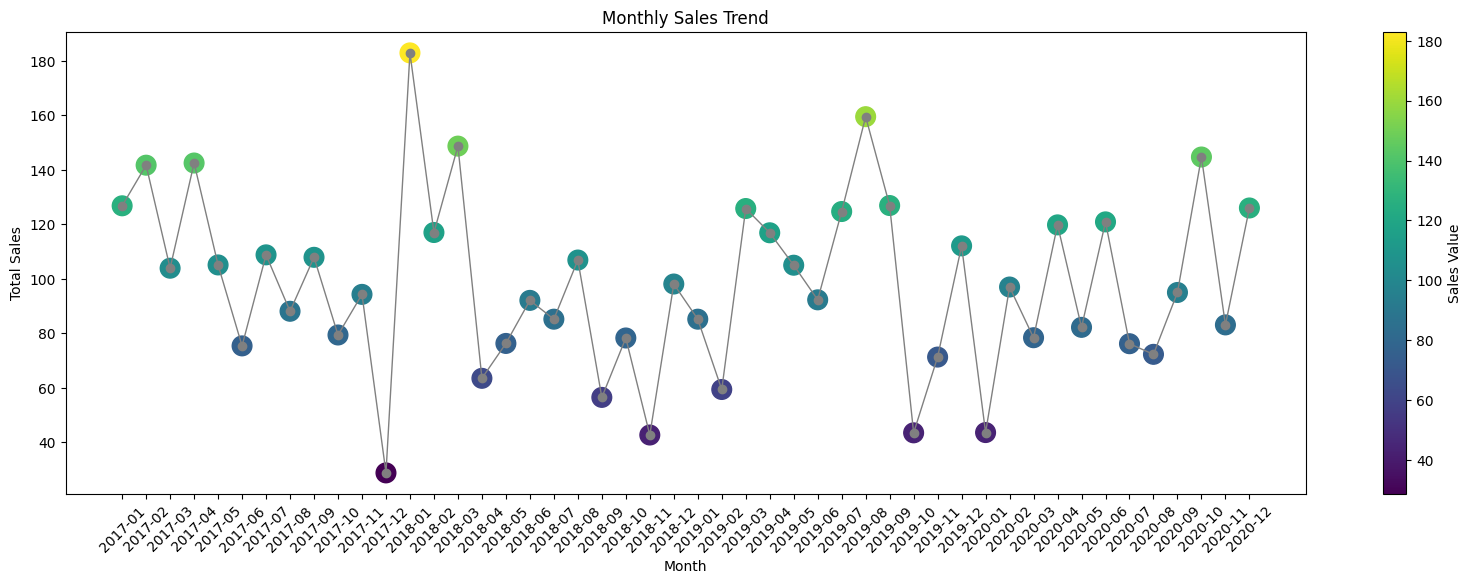

In [176]:
#Monthly Sales Trend

x = monthly_sales['year_month']
y = monthly_sales['total']

plt.figure(figsize= (20,6))

plt.plot(x ,
         y ,
         marker= "o",
         color='gray',
         linewidth= 1   )

scatter = plt.scatter(x, y, c=y, cmap='viridis', s=200)
plt.colorbar(scatter, label="Sales Value")  # يظهر سلم الألوان


plt.xticks(rotation= 45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
#plt.grid(True)

plt.show()

In [177]:
fig = px.line(
    monthly_sales, 
    x="year_month", 
    y="total", 
    markers=True, 
    title="Monthly Sales Trend",
    text= y
)

fig.update_traces(line=dict(width=3, color="royalblue"),
                  texttemplate="%{text:.1f}", )  

fig.update_layout(
    template="plotly_white",
    xaxis_title="Month",
    yaxis_title="Total Sales",
    xaxis=dict(tickangle=45)
)


fig.show()

## 4. Top Genres by Revenue:
أي Genre جاب أكبر مبيعات (بدمج track, genre, invoice_line، invoice).


In [92]:
# using SQL
query_name_revenue = """
Select  Round(SUM(il.unit_price * il.quantity),1) as revenue , 
        g.name ,
      
        t.album_id , t.unit_price , al.title AS album

FROM  invoice_line  il

JOIN  track t  ON il.track_id = t.track_id
JOIN  genre  g ON t.genre_id = g.genre_id
Join  album al ON al.album_id = t.album_id

GROUP BY g.name
ORDER BY revenue DESC

"""
top_genres_revenue = pd.read_sql_query(query_name_revenue, conn)
top_genres_revenue


,revenue,name,album_id,unit_price,album
0,2608.6,Rock,91,0.99,Use Your Illusion I
1,612.8,Metal,207,0.99,Mezmerize
2,487.1,Alternative & Punk,39,0.99,International Superhits
3,165.3,Latin,73,0.99,Unplugged
4,157.4,R&B/Soul,146,0.99,Seek And Shall Find: More Of The Best (1963-1981)
5,122.8,Blues,20,0.99,The Best Of Buddy Guy - The Millenium Collection
6,119.8,Jazz,87,0.99,Quanta Gente Veio ver--Bônus De Carnaval
7,115.8,Alternative,260,0.99,Cake: B-Sides and Rarities
8,73.3,Easy Listening,83,0.99,My Way: The Best Of Frank Sinatra [Disc 1]
9,62.4,Pop,322,0.99,Frank


In [29]:
fig = px.bar(
    top_genres_revenue, 
    x= "name" ,
    y= "revenue",
    title="Top Genres by Revenue"
)


colors = pc.sample_colorscale(
    "Blues",
[i/len(top_genres_revenue) for i in range(len(top_genres_revenue))]
)[::-1]

fig.update_traces(marker=dict(color=colors))
fig.update_layout( template="plotly_white")
fig.show()


## 5. Top Tracks by Quantity Sold
أكتر الأغاني اللي اتباعت بالعدد (quantity).

track_id	quantity

In [132]:
query_invoice_line = """
SELECT   SUM(il.quantity) AS total ,
        il.track_id ,
        t.name, al.title AS album
        
FROM invoice_line il

JOIN track t ON il.track_id = t.track_id
Join  album al ON al.album_id = t.album_id

GROUP BY  t.name
ORDER BY total DESC

"""

invoice_line_df = pd.read_sql_query(query_invoice_line, conn)
invoice_line_df.head(3)

,total,track_id,name,album
0,33,3336,War Pigs,Cake: B-Sides and Rarities
1,14,1495,Highway Chile,Are You Experienced?
2,14,158,Changes,Black Sabbath Vol. 4 (Remaster)


In [130]:
Top_Tracks_by_Quantity = invoice_line_df.groupby(["name","track_id", "album"])["total"].sum()
Top_Tracks_by_Quantity = Top_Tracks_by_Quantity.sort_values(ascending= False ).head(10).reset_index()
Top_Tracks_by_Quantity

,name,track_id,album,total
0,War Pigs,3336,Cake: B-Sides and Rarities,33
1,Changes,158,Black Sabbath Vol. 4 (Remaster),14
2,Are You Experienced?,1489,Are You Experienced?,14
3,Highway Chile,1495,Are You Experienced?,14
4,Put The Finger On You,6,For Those About To Rock We Salute You,13
5,Third Stone From The Sun,1487,Are You Experienced?,13
6,Hey Joe,1490,Are You Experienced?,13
7,Drain You,1988,From The Muddy Banks Of The Wishkah [live],12
8,Radio/Video,2558,Mezmerize,12
9,Love Or Confusion,1483,Are You Experienced?,12


In [32]:
fig= px.bar(Top_Tracks_by_Quantity,
       x= "name",
       y="total",
       title="Top_Tracks_by_Quantity",
)


colors = pc.sample_colorscale(
    "Blues",
[i/len(Top_Tracks_by_Quantity) for i in range(len(Top_Tracks_by_Quantity))]
)[::-1]

fig.update_traces(marker=dict(color=colors))
fig.update_layout( template="plotly_white")
fig.show()

In [33]:
colors = pc.sample_colorscale(
    "Blues",
[i/len(Top_Tracks_by_Quantity) for i in range(len(Top_Tracks_by_Quantity))]
)[::-1]

fig = px.pie(
    Top_Tracks_by_Quantity,
    names="name",
    values="total",
    title="Top_Tracks_by_Quantity",
)

fig.update_traces(marker=dict(colors=colors))
fig.show()


🔵 تحليلات الفنانين والألبومات (Artist & Album Analysis):

Top Artists by Number of Tracks:
مين الفنانين اللي عندهم أكبر عدد أغاني؟

Top Artists by Revenue:
نربط artist + album + track + invoice_line عشان نعرف مين الفنان اللي جاب أكبر فلوس.

Albums with Highest Revenue:
أكتر 10 ألبومات حققت دخل.

🟣 تحليل الموظفين (Employee / Support Analysis):

Sales by Support Rep:
في جدول employee فيه Support Rep لكل عميل. عايزين نشوف كل موظف عملاءه صرفوا قد إيه (تقييم الأداء).

## 6. Top Artists by Number of Tracks: 
track : name, album_id 

album : artest_id

artist: name

In [142]:
query_artist_tracks = """
SELECT ar.name AS artist_name ,
       count(t.name) AS track_count ,
       al.title as album

FROM track t

JOIN album  al ON t.album_id  = al.album_id
JOIN artist ar ON al.artist_id  =  ar.artist_id

GROUP BY ar.name
ORDER BY track_count DESC
"""

artist_tracks = pd.read_sql_query(query_artist_tracks , conn)
Top_artist_tracks = artist_tracks.head(10)
Top_artist_tracks

,artist_name,track_count,album
0,Iron Maiden,213,A Matter of Life and Death
1,U2,135,Achtung Baby
2,Led Zeppelin,114,BBC Sessions [Disc 1] [live]
3,Metallica,112,Garage Inc. (Disc 1)
4,Lost,92,"Lost, Season 3"
5,Deep Purple,92,MK III The Final Concerts [Disc 1]
6,Pearl Jam,67,Live On Two Legs [live]
7,Lenny Kravitz,57,Greatest Hits
8,Various Artists,56,Axé Bahia 2001
9,The Office,53,"The Office, Season 1"


In [35]:

fig = px.bar(
    Top_artist_tracks,
    x="artist_name",
    y="track_count",
    title="Top Artists by Number of Tracks"
)

colors = pc.sample_colorscale(
    "Blues",
    [i/len(Top_artist_tracks) for i in range(len(Top_artist_tracks))]
)[::-1]
fig.update_traces(marker=dict(color=colors))
fig.update_layout( template="plotly_white")



In [36]:
import shutil

# مسار ملف الداتا جوه Kaggle
src = "/kaggle/input/chinook-music-store-data/chinook.db"

# انسخه للمجلد الحالي عشان تقدر تنزله
dst = "/kaggle/working/chinook.db"

shutil.copy(src, dst)

print("تم نسخ قاعدة البيانات إلى working directory")


تم نسخ قاعدة البيانات إلى working directory


# Dashboard

## Def

In [219]:
def bar(df, x, y, title , n=10 , hover=None, hover2=None ):
   
    fig = px.bar(
        df,
        x=x,
        y=y,
        title=title,
        text=y ,
        hover_data={hover: True , hover2: True}
                     )   
        
  
    colors = pc.sample_colorscale(
        "Blues",  [i/(n) for i in range((n))]  )[::-1]

    fig.update_traces(
        marker=dict(color=colors),
        textposition="outside",  
        textfont=dict(size=12, color="white")  ,
        
    )
    
    fig.update_layout(template="plotly_white")
    
    return fig


In [208]:
def treemap (df , path , values, color, color_continuous_scale , title): 
   
    fig = px.treemap(
    df,
    path=path,
    values= values,
    color=color,
    color_continuous_scale = color_continuous_scale, 
    title= title,


)
    fig.update_layout(template="plotly_white")
    
    return fig

In [152]:
def line(df, x, y, title ,text, n=10 , markers=True):
   
    fig = px.line(
        df,
        x=x,
        y=y,
        
        title=title,
        text=text
        )
  
   
    fig =fig.update_traces(line=dict(width=3, color="royalblue"),
                  texttemplate="%{text:.1f}",
                  textfont=dict(size=12, color="black")  
    )
    
    fig= fig.update_layout(template="plotly_white")
    
    return fig

In [182]:
def pie(df, names, values, title , text ,  n=10 , hover=None, hover2=None  ):

    fig = px.pie(
    df,
    names= names,
    values= values,
    title= title,  
    #text= names,
    hover_data={hover: True , hover2: True} )
    
    colors = pc.sample_colorscale(
        "Blues",  [i/(n) for i in range((n))]  )[::-1]
    
    fig.update_traces(
        marker=dict(colors=colors),
        textinfo="label+percent",  
        textposition="inside"      
    )
 
    return fig

In [148]:
Top_artist_tracks

,artist_name,track_count,album
0,Iron Maiden,213,A Matter of Life and Death
1,U2,135,Achtung Baby
2,Led Zeppelin,114,BBC Sessions [Disc 1] [live]
3,Metallica,112,Garage Inc. (Disc 1)
4,Lost,92,"Lost, Season 3"
5,Deep Purple,92,MK III The Final Concerts [Disc 1]
6,Pearl Jam,67,Live On Two Legs [live]
7,Lenny Kravitz,57,Greatest Hits
8,Various Artists,56,Axé Bahia 2001
9,The Office,53,"The Office, Season 1"


## fig1 : Top Customers by Spending"

In [96]:
fig1 = bar(top_customers ,"customer_name" , "total_spent" , "Top Customers by Spending", 12, "country")
fig1

## fig2 : Customer Distribution by Country

In [209]:
fig2 = treemap(
    customers_country_distribution,
    path=["country",  "city"],   # ممكن تغيرها لأي داتا تانية
    values="customer_count",
    color="customer_count",
    color_continuous_scale="Blues",
    title="Customer Distribution by Country, State, City",
)

fig2.show()

In [ ]:
scatter_mapbox 
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  
    width=500,  # Width of map
    height=500,  # Height of map
    hover_data=["price_usd"], 
    color = "price_usd“  # grad accord to )

## fig3 : Monthly Sales Trend

In [52]:
fig3 = line(
    monthly_sales, 
    x="year_month", 
    y="total", 
    title="Monthly Sales Trend",
    text= "total",
    n= 12
)
fig3

## fig4 : top_genres_revenue

In [106]:
fig4 = bar(top_genres_revenue,  "name" , "revenue","Top Genres by Revenue" ,30 , "unit_price","album"  )
fig4

## fig5 : Top_Tracks_by_Quantity

In [135]:
fig5 = bar(
    invoice_line_df.head(10),
    x="name",
    y="total",
    title="Top_Tracks_by_Quantity",
    n=15,
    hover="album"  
)
#def bar(df, x, y, title , n , hover,hover2=None ):
fig5

## fig6 :  Top Artists by Number of Tracks

In [184]:
fig6 = pie( Top_artist_tracks , "artist_name", "track_count" , "Top Artists by Number of Tracks","artist_name", 15, "album" )
fig6

In [ ]:
fig2 = treemap(
    customers_country_distribution,
    path=["country",  "city"],   # ممكن تغيرها لأي داتا تانية
    values="customer_count",
    color="customer_count",
    color_continuous_scale="Blues",
    title="Customer Distribution by Country, State, City",
)

fig2.show()

## fig7 : MAP

In [215]:
# مثال مبسط لإضافة lat/lon
coords = {
    "USA": {"lat": 37.0902, "lon": -95.7129},
    "Canada": {"lat": 56.1304, "lon": -106.3468},
    "Brazil": {"lat": -14.2350, "lon": -51.9253},
    "France": {"lat": 46.2276, "lon": 2.2137}
}

customers_country_distribution["lat"] = customers_country_distribution["country"].map(lambda x: coords.get(x, {}).get("lat"))
customers_country_distribution["lon"] = customers_country_distribution["country"].map(lambda x: coords.get(x, {}).get("lon"))


In [217]:
fig = px.scatter_mapbox(
    customers_country_distribution, 
    lat="lat",
    lon="lon",
    hover_data=["country", "customer_count"], 
    color="customer_count",
    zoom=1,
    width=700,
    height=500
)

fig.update_layout(mapbox_style="carto-positron")
fig.show()


NameError: name 'customer' is not defined

In [ ]:
z